In [11]:
#importamos todas las bibliotecas que podamos utilizar
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Direccion URL del archivo de datos en formato RAW
url = "https://raw.githubusercontent.com/Ferlinn95/Computacional-I/master/Actividad%201/Climatologia%20Diaria.txt"

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   4041 non-null   datetime64[ns]
 1   Precip  4040 non-null   float64       
 2   Evap    2563 non-null   float64       
 3   Tmax    4024 non-null   float64       
 4   Tmin    4040 non-null   float64       
 5   Año     4041 non-null   int64         
 6   Mes     4041 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 221.1 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1977-08-01     0.0  11.5  40.0  27.0  1977    8
1 1977-08-02     0.0  10.9  39.0  27.0  1977    8
2 1977-08-03     0.0  11.5  42.0  25.0  1977    8
3 1977-08-04     0.0  11.5  43.0  24.0  1977    8
4 1977-08-05     0.0  10.8  43.0  24.0  1977    8
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
4036 2004-12-27     0.0   NaN  22.0   6.0  2004   12
4037 2004-12-28     0

# **OJO** 
Hay que tener en cuenta que necesitamos hacer una conversión de la columna de mes a cadena de caracteres (en este caso **Variable categórica**), en lugar de tener los meses denotados por enteros. Utilizaremos la función **".dt.strftime('%b')"** , donde  **%b** representa los meses en formato: Jan, Feb, Mar,..., Nov, Dec. 


In [13]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   4041 non-null   datetime64[ns]
 1   Precip  4040 non-null   float64       
 2   Evap    2563 non-null   float64       
 3   Tmax    4024 non-null   float64       
 4   Tmin    4040 non-null   float64       
 5   Año     4041 non-null   int64         
 6   Mes     4041 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 221.1+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1977-08-01     0.0  11.5  40.0  27.0  1977  Aug
1 1977-08-02     0.0  10.9  39.0  27.0  1977  Aug
2 1977-08-03     0.0  11.5  42.0  25.0  1977  Aug
3 1977-08-04     0.0  11.5  43.0  24.0  1977  Aug
4 1977-08-05     0.0  10.8  43.0  24.0  1977  Aug
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
4036 2004-12-27     0.0   NaN  22.0   6.0  2004  Dec
4037 2004

# **Análisis Exploratorio de Datos**
Iniciaremos una colección de funciones para realizar los que se llama Análisis Exploratorio de Datos.

El EDA, como su nombre lo indica, nos concentramos en investigar todo lo relacionado con la forma y contenido del DatFrame.

Entre algunas las características en las nos centramos por ejemplo son:

Estructuras/patrones en los datos
Número de datos faltantes
Detección de datos anómalos y valores extremos
Extraer y seleccionar variables importantes
Probar alguna teoría de comportamiento de los datos
Aplicamos una serie de funciones al DatFrame para caracterizarlo. Ya hemos utilizado algunas de ellas en la Actividad anterior, y agregaremos un conjunto adicional de ellas.

#**Descripción general de un DataFrame**

Lista de funciones a aplicar:

**df.shape** : Forma y dimensiones de df.

**df.types** : Tipo de datos de las columnas (numéricas o categóricas).

**df.head()**, **df.tail()**, **df.sample(5)** : Despliege de un número de renglones, para ver la estructura de df, nombres de columnas o si los datos tienen sentido a lo esperado.

**df.info()** : Proporciona información general de la estructura y componentes de df

**df.describe()** : Descripción estadística de las variables numéricas.

**df.describe(include='object')** : Descripción estadística de las variables categóricas.

**df.isnull().sum()** : Suma de valores faltantes.

#**Actividad 1** 
Por favor, sintetiza las características del conjunto de datos que estas analizando.

In [14]:
#Forma y dimensiones del DF
print(df_meteo.shape)

#Tipos de datos de la columna (numerica o categorica)
print(df_meteo.dtypes)

#Desplegar los renglones para ver la estructura del DF
print(df_meteo.head())
print(df_meteo.tail())
print(df_meteo.sample(5))

#Proporciona informacion general de la estructura y los componentes del DF
print(df_meteo.info())

#Descripcion estadistica de las variables numericas
print(df_meteo.describe())

#Suma los valores restantes
df_meteo.isnull().sum()


(4041, 7)
Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Año                int64
Mes               object
dtype: object
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1977-08-01     0.0  11.5  40.0  27.0  1977  Aug
1 1977-08-02     0.0  10.9  39.0  27.0  1977  Aug
2 1977-08-03     0.0  11.5  42.0  25.0  1977  Aug
3 1977-08-04     0.0  11.5  43.0  24.0  1977  Aug
4 1977-08-05     0.0  10.8  43.0  24.0  1977  Aug
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
4036 2004-12-27     0.0   NaN  22.0   6.0  2004  Dec
4037 2004-12-28     0.0   NaN  21.0   8.0  2004  Dec
4038 2004-12-29     0.0   NaN  23.0  11.0  2004  Dec
4039 2004-12-30     0.0   NaN  21.0   9.5  2004  Dec
4040 2004-12-31     0.0   NaN   NaN   6.0  2004  Dec
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
3482 2003-06-22     0.0   NaN  38.0  19.0  2003  Jun
3166 2002-08-10     0.0   NaN  43.0  22.5  2002  Aug
121  1977-11-30     0.0 

Fecha        0
Precip       1
Evap      1478
Tmax        17
Tmin         1
Año          0
Mes          0
dtype: int64

#**Actividad 2 - HISTROGRAMAS Y DISTRIBUCION DE PROBABILIDAD**
Crea un **Histograma** de las variables de **Precipitación**, **Evaporación**, **Temperaturas Máxima** y **Mínima** de el conjunto de datos que se están analizando (Función: **sns.histplot())**. Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: **sns.kdeplot())**.




#**Precipitacion**

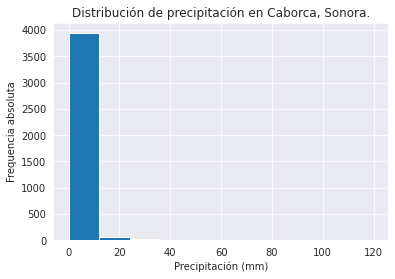

In [15]:
#Elaboraremos un histograma
plt.hist(df_meteo.Precip, bins=10)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia absoluta')
plt.title('Distribución de precipitación en Caborca, Sonora.')
#plt.grid()
plt.show()

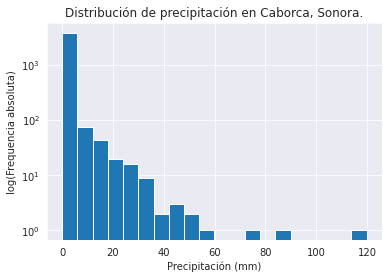

In [16]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje Y para mejor visualización
plt.hist(df_meteo.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia absoluta)')
plt.title('Distribución de precipitación en Caborca, Sonora.')
#plt.grid()
plt.show()

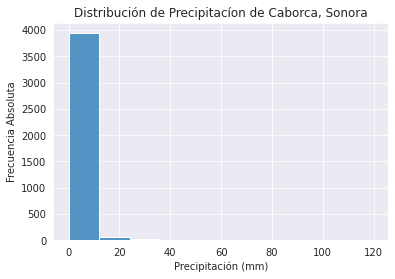

In [17]:
#Hacemos lo mismo pero ahora es un histograma con Seaborn de la precipitación.
sns.set_style("darkgrid")

#Nombramos los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitacíon de Caborca, Sonora')

sns.histplot(data=df_meteo, x='Precip', bins=10, );
plt.show()

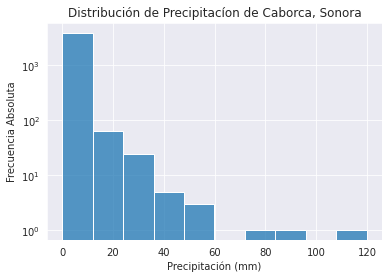

In [18]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje Y para mejor visualización
sns.set_style("darkgrid")

#Nombramos los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')

plt.title('Distribución de Precipitacíon de Caborca, Sonora')

sns.histplot(data=df_meteo, x='Precip', bins=10,  log_scale=(False,True));
plt.show()

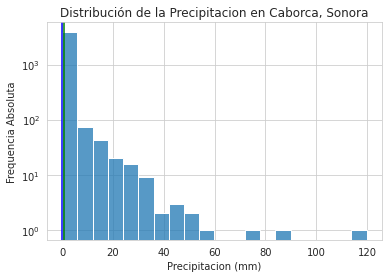

In [19]:
# Gráfica de la Precipitacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False, True));
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Pmed, color = 'b', label = 'm') 
plt.axvline(x = Pprom, color = 'g', label = 'x')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitacion en Caborca, Sonora')

plt.show()

In [20]:
print(Pmed)
print(Pprom)

0.0
0.8508663366336637


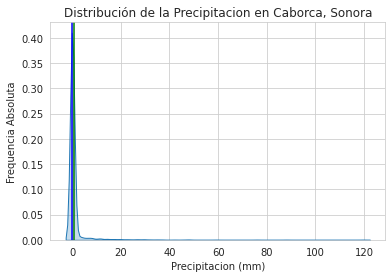

In [21]:
# Gráfica de la Precipitacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.kdeplot(df_meteo.Precip, fill=True);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Pmed, color = 'b', label = 'm') 
plt.axvline(x = Pprom, color = 'g', label = 'x')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitacion en Caborca, Sonora')

plt.show()

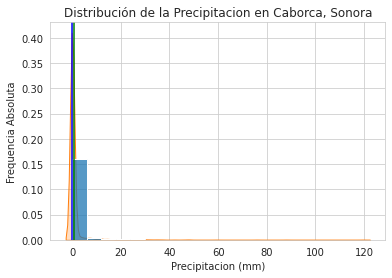

In [22]:
#sobreponiendo ambas 
# Gráfica de la Precipitacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Precip, fill=True);

# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Pmed, color = 'b', label = 'm') 
plt.axvline(x = Pprom, color = 'g', label = 'x')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitacion en Caborca, Sonora')

plt.show()

**Hacemos lo mismo para la Evaporacion, Tmax y Tmin**

#**Evaporacion**

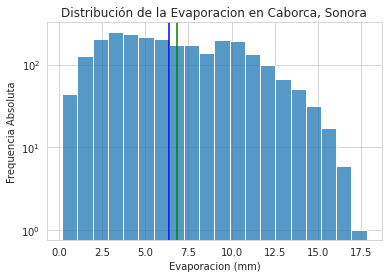

In [23]:
# Gráfica de la Evaporacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20, log_scale=(False, True));
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Emed, color = 'b', label = 'm') 
plt.axvline(x = Eprom, color = 'g', label = 'x')

plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporacion en Caborca, Sonora')

plt.show()

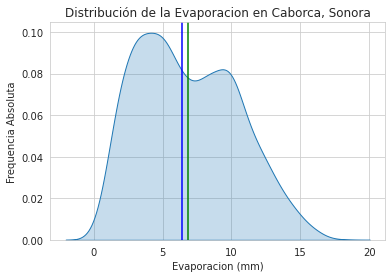

In [24]:
# Gráfica de la Evaporacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.kdeplot(df_meteo.Evap, fill=True);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Emed, color = 'b', label = 'm') 
plt.axvline(x = Eprom, color = 'g', label = 'x')

plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporacion en Caborca, Sonora')

plt.show()

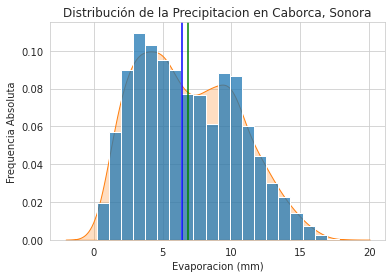

In [25]:
#sobreponiendo ambas 
# Gráfica de la Evaporacion
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Emed, color = 'b', label = 'm') 
plt.axvline(x = Eprom, color = 'g', label = 'x')

plt.xlabel('Evaporacion (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitacion en Caborca, Sonora')

plt.show()

#**Temperatura Maxima**

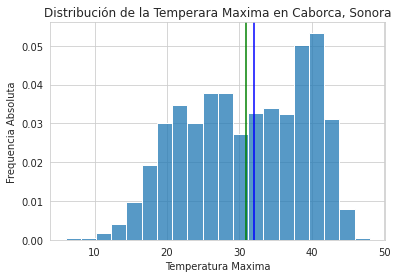

In [26]:
# Gráfica de la Temperatura Maxima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat="density");
#sns.kdeplot(df_meteo.Tmax, fill=True);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura Maxima')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperara Maxima en Caborca, Sonora')

plt.show()


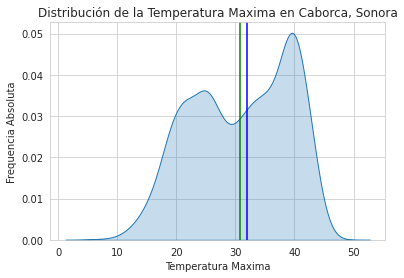

In [27]:
# Gráfica de la Temperatura Maxima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.kdeplot(df_meteo.Tmax, fill=True);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura Maxima')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Maxima en Caborca, Sonora')

plt.show()

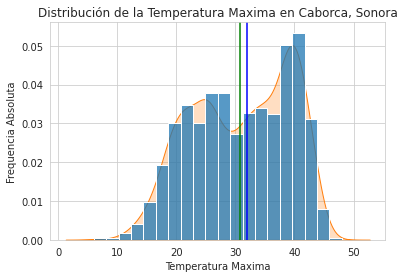

In [28]:
#sobreponiendo ambas 
# Gráfica de la Temperatura Maxima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura Maxima')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Maxima en Caborca, Sonora')

plt.show()

#**Temperatura minima**

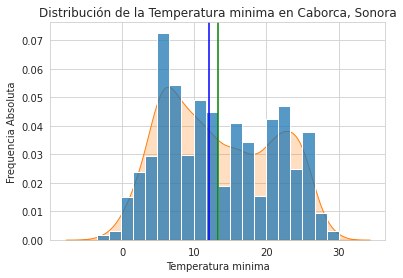

In [29]:
# Gráfica de la Temperatura minima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat="density");
sns.kdeplot(df_meteo.Tmin, fill=True);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura minima')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura minima en Caborca, Sonora')

plt.show()

#**Actividad 3 - GRAFICA DE CAJAS** 
Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: **sns.boxplot()**)

#**Evaporacion**

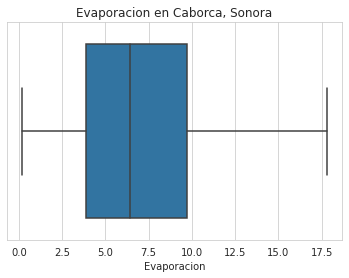

In [30]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporacion', title='Evaporacion en Caborca, Sonora');


#**Temperatura Maxima**

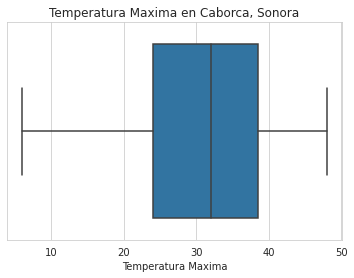

In [31]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura Maxima', title='Temperatura Maxima en Caborca, Sonora');

#**Temperatura minima**

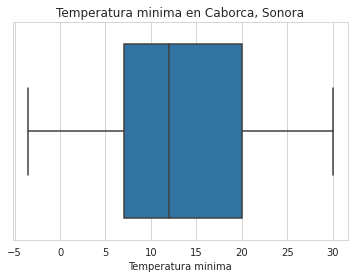

In [32]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura minima', title='Temperatura minima en Caborca, Sonora');

In [33]:
df_dist.head(1)

,Fecha,Precip,Evap,Tmax,Tmin
0,01/08/1977,0,11.5,40,27


In [34]:
df_dist.tail(1)

,Fecha,Precip,Evap,Tmax,Tmin
4040,31/12/2004,0,Nulo,Nulo,6


In [35]:
# Seleccionaremos un conjunto de años de 27 años  
df_27 = df_meteo[(df_meteo['Año'] >= 1977) & (df_meteo['Año'] <= 2004)]

Solo utilice un conjunto de 27 años ya que los datos que utilice estan incompletos (como se puede ver acontinuacion en la grafica, comienza en 1977 y llega hasta 1984, despues hace un brinco hasta 2001 - 2004) 

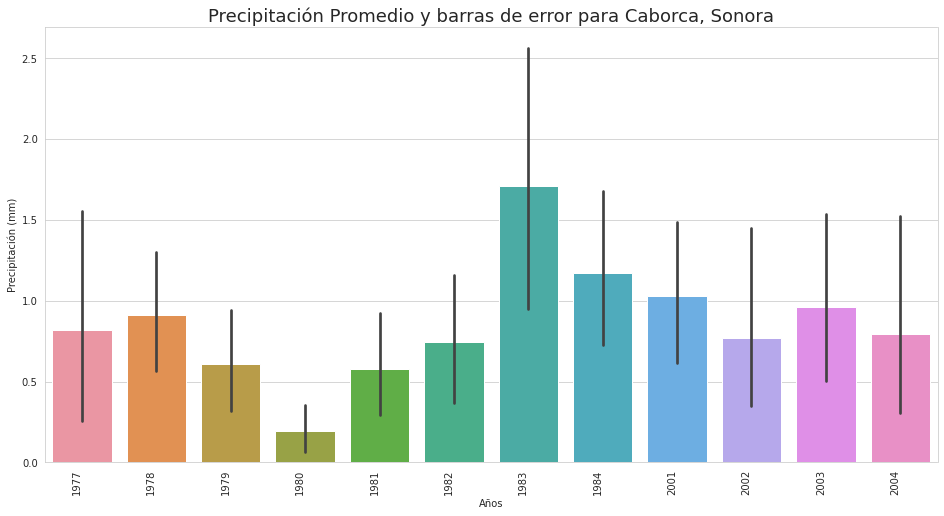

In [36]:
# Gráfica de Precipitación últimos 27 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_27);
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Caborca, Sonora', fontsize=18)

plt.show()

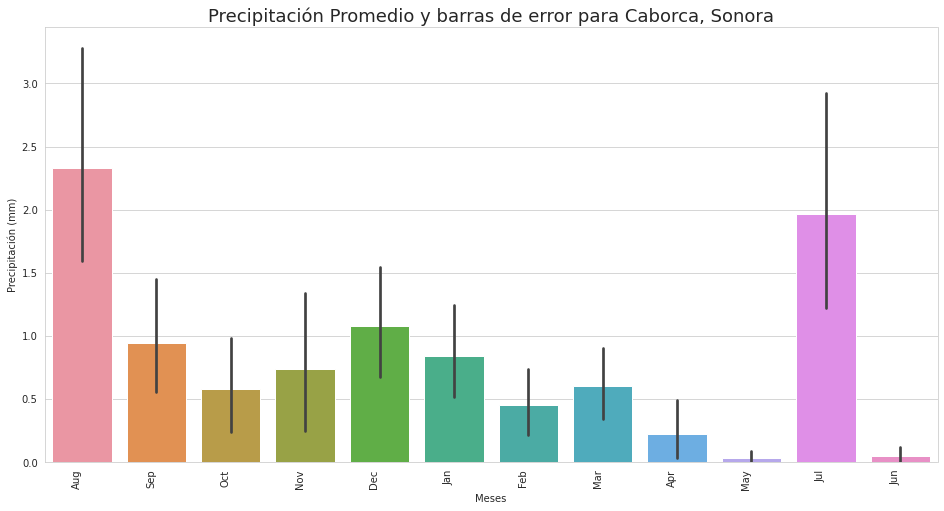

In [37]:
# Gráfica de Precipitación últimos 27 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_27);
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Caborca, Sonora', fontsize=18)

plt.show()

**Gráfica de datos con líneas: sns.lineplot()**

Text(0.5, 1.0, 'Precipitación Promedio y rango de error para Caborca, Sonora')

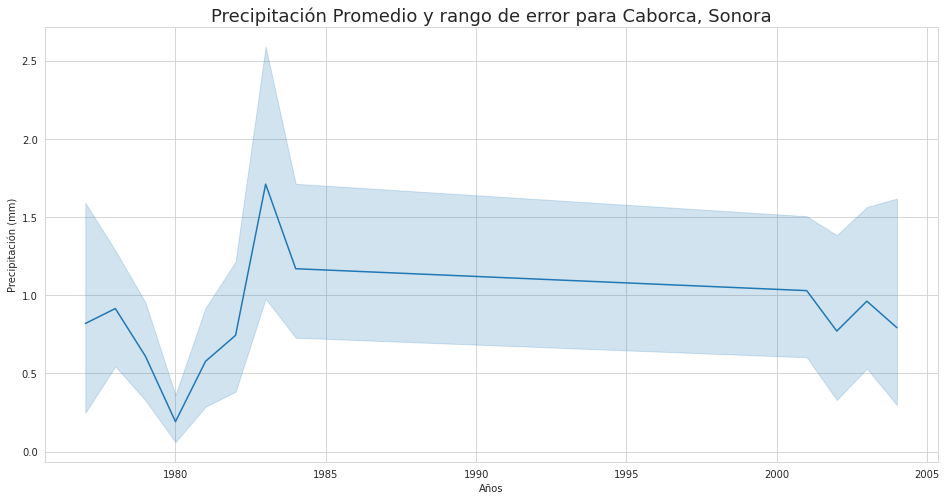

In [38]:
# Gráfica de Precipitación últimos 27 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_27);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Caborca, Sonora', fontsize=18)

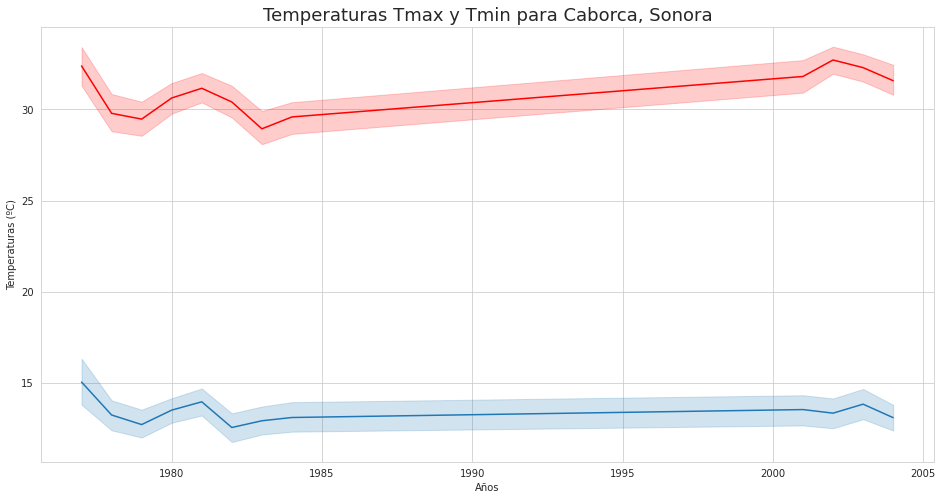

In [39]:
# Gráfica de Temperaturas de últimos 27 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_27, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_27);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Caborca, Sonora', fontsize=18)

plt.show()

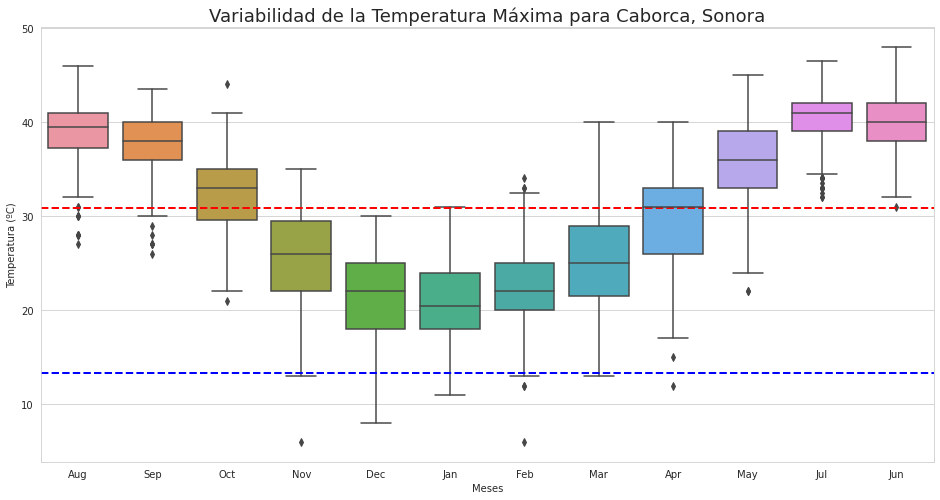

mean(Tmax) =  30.851167992047714
mean(Tmin) =  13.322277227722772
Diff Tmax_ave-Tmin_ave =  17.52889076432494


In [40]:
# Gráfica de Temepraturas Máximas en los últimos 27 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_27);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Caborca, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

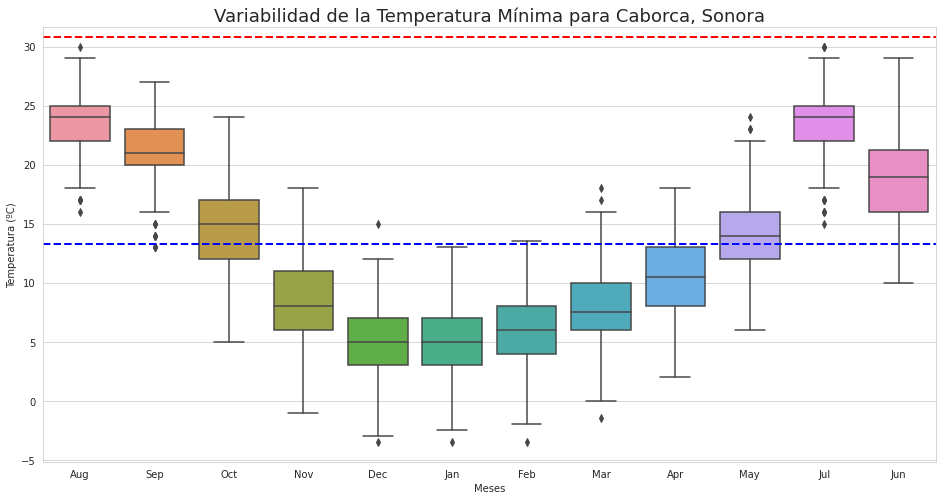

mean(Tmax) =  30.851167992047714
mean(Tmin) =  13.322277227722772
Diff Tmax_ave-Tmin_ave =  17.52889076432494


In [42]:
# Gráfica de Temperaturas Mínimas en los últimos 27 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_27);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Caborca, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

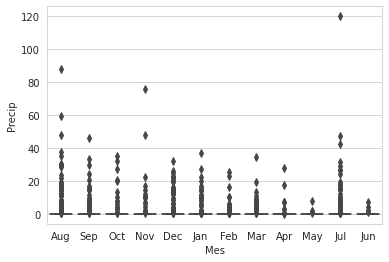

In [44]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_27);